# Data APIs
## 🎯 Learning Objectives

By the end of this notebook, you will be able to:

1. **Access macroeconomic data** — Using the FRED API
2. **Explore alternative data** — Google Trends and real-time stock prices
3. **Download factor data** — Ken French's data library via pandas-datareader
4. **Query institutional databases** — WRDS for academic-quality financial data

## 📋 Table of Contents

1. [Setup](#setup)
2. [FRED API](#fred-api)
3. [Google Trends](#google-trends)
4. [WallStreet: Real-Time Stock Data](#wallstreet)
5. [Pandas DataReader: Ken French Library](#pandas-datareader)
6. [WRDS: Academic Financial Data](#wrds)
7. [Exercises](#exercises)
8. [Key Takeaways](#key-takeaways)

---

## 🛠️ Setup <a id="setup"></a>

In [5]:
#@title 🛠️ Setup: Run this cell first (click to expand)

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set consistent plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ Core libraries loaded!")

✅ Core libraries loaded!


---

## FRED API <a id="fred-api"></a>

### Federal Reserve Economic Data

**FRED** is maintained by the Federal Reserve Bank of St. Louis and contains thousands of macroeconomic and financial time series.

- Browse available data: https://fred.stlouisfed.org/categories
- Example: 3-Month T-Bill yield: https://fred.stlouisfed.org/series/DTB3
- Get your API key: https://research.stlouisfed.org/docs/api/api_key.html

In [2]:
# Install fredapi - a Python wrapper for the FRED API
# This library lets you download economic data directly into pandas DataFrames
!pip install fredapi

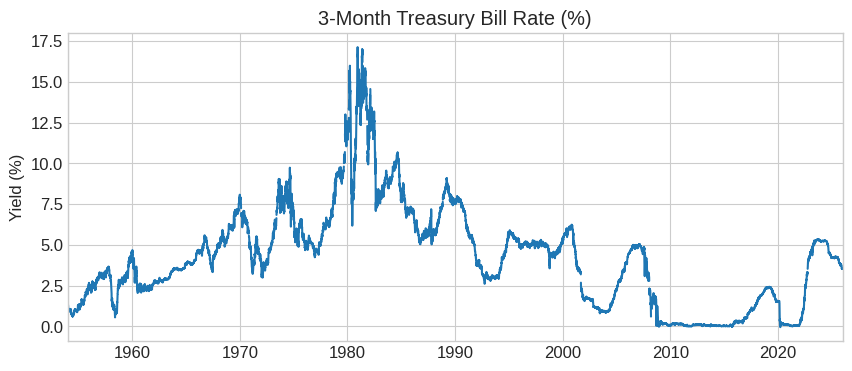

In [3]:
from fredapi import Fred

# Initialize with API key
fred = Fred(api_key='f9207136b3333d7cf92c07273f6f5530')

# Download 3-Month T-Bill rate
tbill_3m = fred.get_series('DTB3')
tbill_3m.plot(title='3-Month Treasury Bill Rate (%)', figsize=(10, 4))
plt.ylabel('Yield (%)')
plt.show()

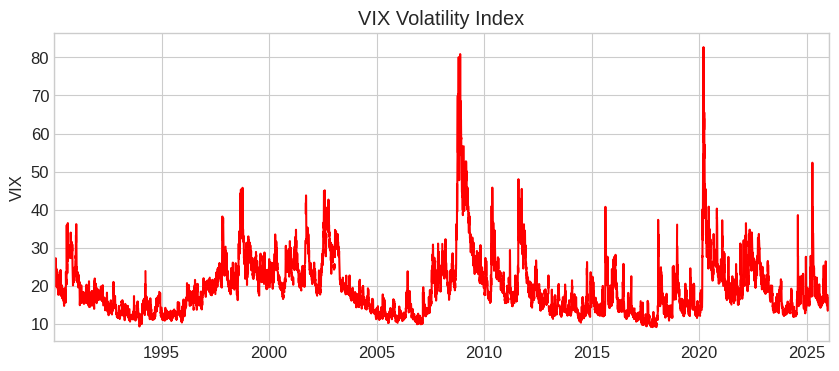

In [4]:
# Download VIX - the "fear index"
vix = fred.get_series('VIXCLS')
vix.plot(title='VIX Volatility Index', figsize=(10, 4), color='red')
plt.ylabel('VIX')
plt.show()

> **💡 Key Insight:**
>
> FRED is your go-to source for **macroeconomic data**: interest rates, GDP,
> unemployment, inflation, and more. All free with an API key!

---

## Google Trends <a id="google-trends"></a>

### Alternative Data: Search Interest

Google Trends provides data on search interest over time. This is an example of **alternative data** — non-traditional data sources that can provide unique insights.

Here I am going to get data from https://serpapi.com/

You can sign up for a free account to get an API_KEY

It allows you to tap all sort of information form Google. Here we will use to get google_trends

Google_trends is often use as a proxy for attention of retail investors

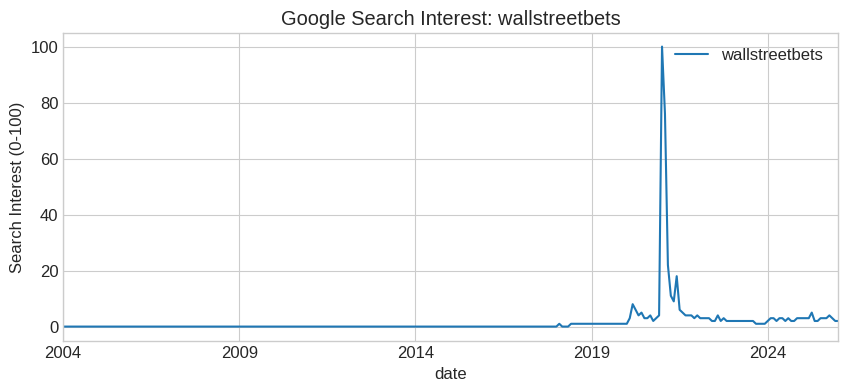

In [35]:
!pip install google-search-results
from serpapi import GoogleSearch
import pandas as pd
import matplotlib.pyplot as plt

# ⚠️ Uncomment the lines below after adding your API Key
#API_KEY='a8667ee3d37e1dd2990c4084515c73d0a53fa6a2bad51fd03afbdcac7a8b9f9d'

# this gives parameters to the API
params = {
  "api_key": API_KEY,
  "engine": "google_trends",
  "q": "GME",
  "date": "all"
}
# This calls the API
search = GoogleSearch(params)
results = search.get_dict()

# now we need to put this in format that is good for plotting

# Extract timeline data from the dictionary and put it dataframe format
timeline = results.get('interest_over_time', {}).get('timeline_data', [])

records = []
for point in timeline:
    row = {'date': point['date']}
    row.update({v['query']: v['extracted_value'] for v in point['values']})
    records.append(row)
df = pd.DataFrame(records)

# Plot

df['date'] = pd.to_datetime(df['date'])
df.set_index('date').plot(title='Google Search Interest: wallstreetbets', figsize=(10, 4))
plt.ylabel('Search Interest (0-100)')
plt.show()




> **📌 Remember:**
>
> Google Trends can signal retail investor interest. The GME spike in early 2021
> coincided with the famous "meme stock" rally driven by Reddit.

---

## WallStreet: Real-Time Stock Data <a id="wallstreet"></a>

### Real-Time Prices and Historical Data

The `wallstreet` library provides real-time stock quotes and historical data. It also supports options data (calls and puts).

Documentation: https://github.com/mcdallas/wallstreet

In [36]:
# Install wallstreet - real-time stock and options data
# Provides current prices, historical data, and options chains without an API key
!pip install yfinance

GME current price: $21.10
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


<Axes: title={'center': 'GME Price History'}, xlabel='Date'>

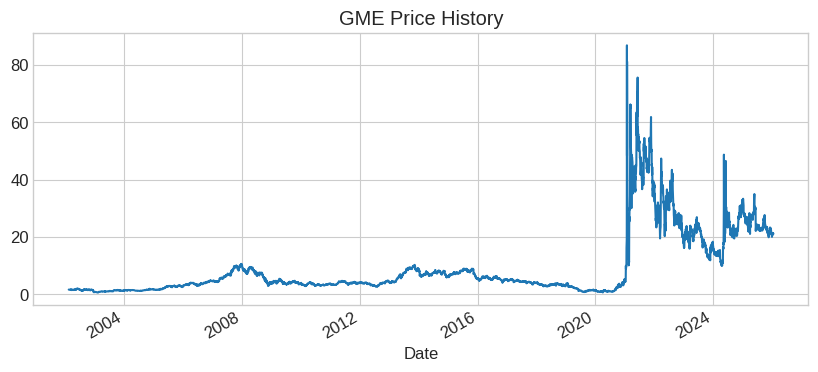

In [38]:
import yfinance as yf

# Single stock - current price
gme = yf.Ticker('GME')
print(f"GME current price: ${gme.info['currentPrice']:.2f}")

# Historical data (returns a DataFrame!)
df = gme.history(period='max')  # or '5y', 'max', etc.
print(df.head())

# Quick plot
df['Close'].plot(title='GME Price History', figsize=(10, 4))

[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

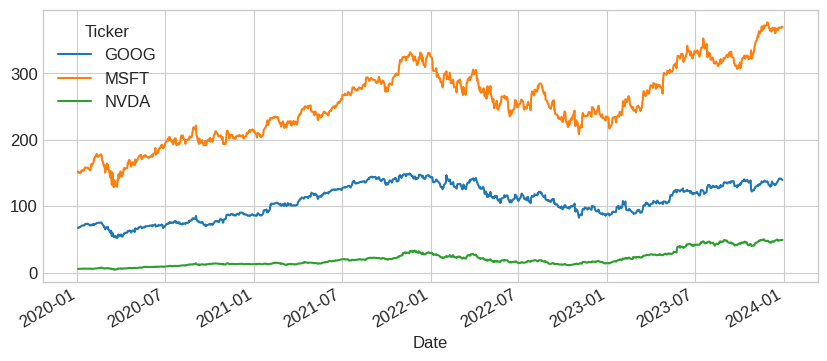

In [43]:
df = yf.download(['NVDA', 'MSFT', 'GOOG'], start='2020-01-01', end='2024-01-01')
df['Close'].plot(figsize=(10, 4))

---

## Pandas DataReader: Ken French Library <a id="pandas-datareader"></a>

### Academic Factor Data

**Pandas DataReader** connects to many data sources. We're most interested in **Ken French's data library**, which provides returns on factor portfolios used in academic finance.

Documentation: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [44]:
# Install pandas-datareader - connects to various financial data sources
# Key feature: access to Ken French's factor data library (297 datasets!)
!pip install pandas_datareader

In [45]:
from pandas_datareader.famafrench import get_available_datasets

# How many datasets are available?
datasets = get_available_datasets()
print(f"Ken French Library has {len(datasets)} datasets!")

Ken French Library has 297 datasets!


In [46]:
from datetime import datetime
import pandas_datareader.data as web

# Download the 49 Industry Portfolios
start = datetime(1926, 1, 1)
ds = web.DataReader('49_Industry_Portfolios', 'famafrench', start=start)

# See what's included
print(ds['DESCR'])

49 Industry Portfolios
----------------------

This file was created using the 202511 CRSP database. It contains value- and equal-weighted returns for 49 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2025 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (1193 rows x 49 cols)
  1 : Average Equal Weighted Returns -- Monthly (1193 rows x 49 cols)
  2 : Average Value Weighted Returns -- Annual (98 rows x 49 cols)
  3 : Average Equal Weighted Returns -- Annual (98 rows x 49 cols)
  4 : Number of Firms in Portfolios (1193 rows x 49 cols)
  5 : Average Firm Size (1193 rows x 49 cols)
  6 : Sum of BE / Sum of ME (100 rows x 49 cols)
  7 : Value-Weighted Average of BE/ME (100 rows x 49 cols)


The dataset contains **7 different tables**:

| Index | Contents |
|-------|----------|
| 0 | Value-weighted monthly returns |
| 1 | Equal-weighted monthly returns |
| 2 | Value-weighted annual returns |
| ... | ... |
| 6 | Book-to-market ratios |

In [47]:
# Get value-weighted monthly returns (index 0)
industry_returns = ds[0]
industry_returns.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2025-07,-1.94,-0.38,-4.12,3.38,-5.84,2.04,-8.73,-3.33,-3.10,2.51,...,-0.42,-2.06,0.14,3.11,-2.51,0.82,-9.74,10.67,4.49,-2.32
2025-08,2.81,0.13,3.43,3.49,3.87,6.39,5.00,5.69,3.27,4.25,...,1.99,4.21,1.54,0.85,0.88,5.11,7.49,5.79,-0.20,4.46
2025-09,-9.46,-1.77,-1.54,-7.12,-2.09,-3.06,-1.69,0.91,-3.54,-5.42,...,-3.89,0.49,0.80,-1.06,-4.61,0.13,1.63,-3.50,2.96,-0.75
2025-10,-8.64,-5.43,3.16,3.37,-11.53,0.73,-6.36,-8.03,-3.04,-6.04,...,-7.86,-0.24,0.02,2.85,-3.60,-0.10,-6.36,-1.88,-2.97,-4.21
2025-11,8.12,3.14,6.20,2.36,7.82,9.20,-1.53,2.25,1.14,3.88,...,4.45,0.55,1.77,-0.42,6.60,1.35,3.30,7.15,0.29,6.18


In [48]:
# Get book-to-market ratios (index 6)
book_to_market = ds[6]
book_to_market.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2021,0.85,0.41,0.09,0.17,-0.05,0.10,0.10,0.55,0.12,0.13,...,0.30,0.17,0.24,0.12,0.01,0.64,0.65,0.32,0.45,0.66
2022,0.71,0.39,0.10,0.18,-0.05,0.20,0.11,0.50,0.11,0.13,...,0.32,0.17,0.21,0.11,0.02,0.53,0.51,0.29,0.36,0.63
2023,0.62,0.40,0.10,0.16,-0.05,0.40,0.19,0.67,0.17,0.17,...,0.43,0.23,0.24,0.15,0.01,0.64,0.35,0.34,0.40,0.59
2024,0.75,0.44,0.11,0.21,-0.07,0.31,0.15,0.51,0.16,0.18,...,0.41,0.19,0.21,0.13,0.02,0.71,0.39,0.37,0.36,0.58
2025,0.60,0.48,0.10,0.24,-0.05,0.31,0.10,0.44,0.15,0.22,...,0.35,0.20,0.19,0.11,0.01,0.57,0.38,0.32,0.31,0.58


### Browsing All Available Datasets

In [49]:
# View first 20 available datasets
print("First 20 Ken French datasets:")
for i, name in enumerate(datasets[:20]):
    print(f"  {i+1}. {name}")

First 20 Ken French datasets:
  1. F-F_Research_Data_Factors
  2. F-F_Research_Data_Factors_weekly
  3. F-F_Research_Data_Factors_daily
  4. F-F_Research_Data_5_Factors_2x3
  5. F-F_Research_Data_5_Factors_2x3_daily
  6. Portfolios_Formed_on_ME
  7. Portfolios_Formed_on_ME_Wout_Div
  8. Portfolios_Formed_on_ME_Daily
  9. Portfolios_Formed_on_BE-ME
  10. Portfolios_Formed_on_BE-ME_Wout_Div
  11. Portfolios_Formed_on_BE-ME_Daily
  12. Portfolios_Formed_on_OP
  13. Portfolios_Formed_on_OP_Wout_Div
  14. Portfolios_Formed_on_OP_Daily
  15. Portfolios_Formed_on_INV
  16. Portfolios_Formed_on_INV_Wout_Div
  17. Portfolios_Formed_on_INV_Daily
  18. 6_Portfolios_2x3
  19. 6_Portfolios_2x3_Wout_Div
  20. 6_Portfolios_2x3_weekly


> **💡 Key Insight:**
>
> Ken French's library is the **gold standard** for factor research.
> It includes Fama-French factors, momentum, industry portfolios, and more.

---

## WRDS: Academic Financial Data <a id="wrds"></a>

### The Gold Standard for Research

**WRDS** (Wharton Research Data Services) is the premier source for academic financial data. It includes:

- **CRSP**: Stock prices, returns, and market data
- **Compustat**: Balance sheet and income statement data
- **IBES**: Analyst forecasts
- **And much more...**

Register for an account: https://wrds-www.wharton.upenn.edu/register/

In [50]:
# Install WRDS library - official Python interface for WRDS database
# Requires a WRDS account (free for academic users)
!pip install wrds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0


In [2]:
import wrds
import psycopg2

# Connect to WRDS (will prompt for username/password)
conn = wrds.Connection()

Enter your WRDS username [root]:am16634
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


### Downloading Stock Returns

WRDS uses SQL queries to access data. Here's a function to download daily returns for a given stock:

In [3]:
def get_returns(tickers, conn, startdate, enddate):
    """Download daily returns for a list of tickers from WRDS CRSP."""
    ticker = tickers[0]
    df = conn.raw_sql("""
        select a.permno, b.ticker, a.date, a.ret
        from crsp.dsf as a
        left join crsp.msenames as b
        on a.permno=b.permno
        and b.namedt<=a.date
        and a.date<=b.nameendt
        where a.date between '""" + startdate + """' and '""" + enddate + """'
        and b.ticker='""" + ticker + "'")

    df.set_index(['date', 'permno'], inplace=True)
    df = df['ret'].unstack()
    return df

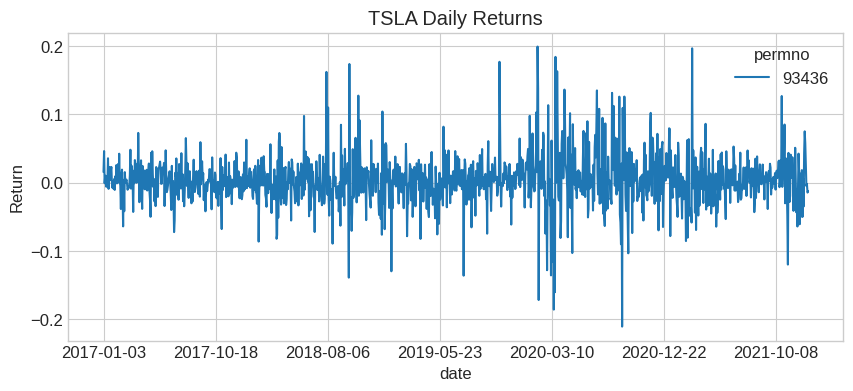

In [6]:
# Download Tesla returns
df_tsla = get_returns(['TSLA'], conn, '1/1/2017', '1/1/2022')
df_tsla.plot(title='TSLA Daily Returns', figsize=(10, 4))
plt.ylabel('Return')
plt.show()

### Getting Price and Shares Outstanding

In [7]:
def get_data(tickers, conn, startdate, enddate):
    """Download price and shares outstanding from WRDS CRSP."""
    ticker = tickers[0]
    df = conn.raw_sql("""
        select a.permno, b.ticker, a.date, a.prc, a.shrout
        from crsp.dsf as a
        left join crsp.msenames as b
        on a.permno=b.permno
        and b.namedt<=a.date
        and a.date<=b.nameendt
        where a.date between '""" + startdate + """' and '""" + enddate + """'
        and b.ticker='""" + ticker + "'")

    df.set_index(['date', 'permno'], inplace=True)
    return df

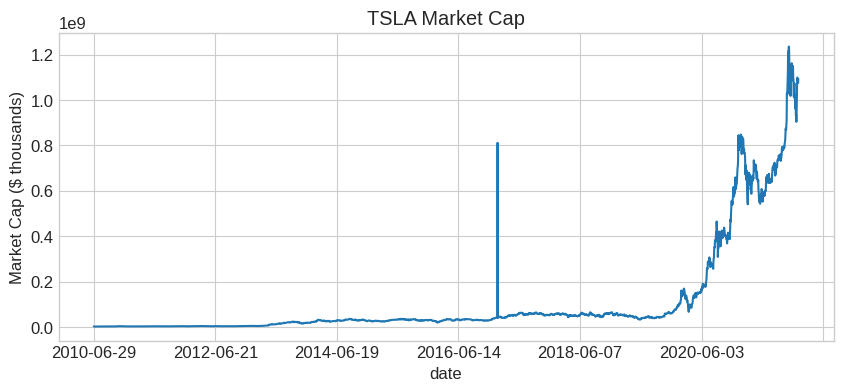

In [8]:
# Download Tesla price data
df = get_data(['TSLA'], conn, '1/1/2005', '1/1/2022')

# Compute market cap (price uses absolute value because negative = bid-ask midpoint)
df['mcap'] = df['prc'].abs() * df['shrout']

# Clean up index and plot
df = df.reset_index().set_index('date')
df['mcap'].plot(title='TSLA Market Cap', figsize=(10, 4))
plt.ylabel('Market Cap ($ thousands)')
plt.show()

> **📌 Remember:**
>
> WRDS variables in CRSP:
> - `ret`: daily return (with dividends)
> - `prc`: price (negative = bid-ask midpoint). When there was not trade at closing--zero probability for Tesla or any large cap
> - `shrout`: shares outstanding (thousands)
> - `vol`: trading volume (shares)

---

## 📝 Exercises <a id="exercises"></a>

### Exercise 1: Warm-up — Explore FRED

> **🔧 Exercise:**
>
> Use the FRED API to:
> 1. Download the 10-Year Treasury yield (`GS10`)
> 2. Download the unemployment rate (`UNRATE`)
> 3. Plot both series on the same figure (use two y-axes)
> 4. What pattern do you observe during recessions?

In [ ]:
# Your code here

<details>
<summary>💡 Click to see solution</summary>

```python
# Download data
gs10 = fred.get_series('GS10')
unrate = fred.get_series('UNRATE')

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(gs10.index, gs10, color='blue', label='10-Year Treasury')
ax1.set_ylabel('10Y Yield (%)', color='blue')

ax2 = ax1.twinx()
ax2.plot(unrate.index, unrate, color='red', label='Unemployment')
ax2.set_ylabel('Unemployment Rate (%)', color='red')

plt.title('Interest Rates vs. Unemployment')
plt.show()

# During recessions: unemployment spikes, rates often fall
```
</details>

### Exercise 2: Extension — Ken French Factor Data

> **🤔 Think and Code:**
>
> Download the Fama-French 3-Factor data:
> 1. Use `web.DataReader('F-F_Research_Data_Factors', 'famafrench')`
> 2. Extract the monthly factors (index 0)
> 3. Plot cumulative returns of MKT-RF, SMB, and HML since 1926
> 4. Which factor had the highest cumulative return? Which had the most volatility?

In [ ]:
# Your code here

<details>
<summary>💡 Click to see solution</summary>

```python
# Download Fama-French factors
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=datetime(1926,1,1))
factors = ff[0] / 100  # Convert from percentage to decimal

# Compute cumulative returns
cum_returns = (1 + factors[['Mkt-RF', 'SMB', 'HML']]).cumprod()

# Plot
cum_returns.plot(figsize=(12, 6), title='Cumulative Factor Returns Since 1926')
plt.ylabel('Cumulative Return ($1 initial)')
plt.yscale('log')
plt.legend(['Market-RF', 'Small-Big', 'High-Low B/M'])
plt.show()

# Summary statistics
print("Annualized Statistics:")
print(f"MKT-RF: mean={factors['Mkt-RF'].mean()*12:.2%}, std={factors['Mkt-RF'].std()*np.sqrt(12):.2%}")
print(f"SMB: mean={factors['SMB'].mean()*12:.2%}, std={factors['SMB'].std()*np.sqrt(12):.2%}")
print(f"HML: mean={factors['HML'].mean()*12:.2%}, std={factors['HML'].std()*np.sqrt(12):.2%}")
```
</details>

### Exercise 3: Open-ended — Industry Analysis

> **🤔 Think and Code:**
>
> Using the 49 Industry Portfolios:
> 1. Compute the annualized mean and volatility for each industry
> 2. Create a scatter plot of mean vs. volatility (each point = one industry)
> 3. Which industries have the best risk-adjusted returns (highest Sharpe)?
> 4. Which industries are the most volatile?

In [ ]:
# Your code here

<details>
<summary>💡 Click to see solution</summary>

```python
# Get industry returns (already loaded as ds[0])
ind_ret = ds[0] / 100  # Convert to decimal

# Compute annualized statistics
ind_mean = ind_ret.mean() * 12
ind_std = ind_ret.std() * np.sqrt(12)
ind_sharpe = ind_mean / ind_std

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ind_std, ind_mean, alpha=0.7)

# Label each point
for i, ind in enumerate(ind_ret.columns):
    ax.annotate(ind, (ind_std[ind], ind_mean[ind]), fontsize=8)

ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Mean Return')
ax.set_title('Industry Risk-Return Tradeoff')
plt.show()

# Top 5 by Sharpe
print("Top 5 industries by Sharpe Ratio:")
print(ind_sharpe.nlargest(5))
```
</details>

---

## 🧠 Key Takeaways <a id="key-takeaways"></a>

1. **FRED** — Free macroeconomic data (rates, GDP, unemployment) via `fredapi`

2. **Google Trends** — Alternative data on search interest via `pytrends`

3. **WallStreet** — Real-time stock/options quotes via `wallstreet`

4. **Ken French Library** — 297 factor/portfolio datasets via `pandas-datareader`

5. **WRDS** — Academic-quality financial data (requires registration)